This is a python notebook investigating microplastic concentrations in the west atlantic. Designed to be run off of colab in google drive, will need to set up directories, change all paths, and setup environment to run outside of colab.

Authors:

Joshua Frank, Jenna Dolsen, Maria Benitez de Lugo Casucci



In [1]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 28.7 MB/s eta 0:00:00


In [2]:
#Import libraries

import pandas as pd
import numpy as np
import os
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
from scipy.stats import linregress
from datetime import datetime, timedelta
import xarray as xr
import cartopy.feature as cfeature

In [3]:
#Preparing for google drive access

drive.mount('/content/drive/')
data_dir = "../content/drive/Shareddrives/ENSC36100_Project/data/"
print(os.listdir(data_dir))
dat = pd.read_csv(data_dir+"Marine_Microplastics.csv")


Mounted at /content/drive/
['Marine_Microplastics.csv']


In [4]:
#Basic filters and exploration

from enum import unique
#display(dat.head())
#display(dat["Sampling Method"].unique())
#display(dat["Mesh size (mm)"].unique())
#display(dat["Region"].unique())
#display([f"{x:.10f}" for x in dat["Water Sample Depth (m)"].unique()])
#display(dat["DOI"].unique())
#display(dat["ORGANIZATION"].unique())
methods = dat["Sampling Method"].unique()
methods.sort()
# for method in methods:
#     print(method)
#     print(len(dat.loc[dat["Sampling Method"]==method]))
#     print(dat.loc[dat["Sampling Method"]==method,"Mesh size (mm)"].unique())
#     print(dat.loc[dat["Sampling Method"]==method,"ORGANIZATION"].unique())
#     print()
print(len(dat))

## Filtering by collection method
dat_Neust = dat.loc[dat["Sampling Method"]=="Neuston net", ]
lon = [-90,-50]
lat = [10,50]
print(len(dat_Neust))
dat_Neust = dat.loc[(dat["Latitude (degree)"]>=lat[0]) & (dat["Latitude (degree)"]<=lat[1]) & (dat["Longitude(degree)"]>=lon[0]) & (dat["Longitude(degree)"]<=lon[1]), ]
print(len(dat_Neust))
display(dat_Neust)

## Filtering by unit
display((dat_Neust["Unit"]))
unit_counts = dat_Neust["Unit"].value_counts()
display(unit_counts)
filtered_Neust = dat_Neust[dat_Neust['Unit'] == 'pieces/m3']
filtered_Neust = filtered_Neust[filtered_Neust['Microplastics measurement'] > 0]
print(len(filtered_Neust))


22530
10394
8685


,OBJECTID,Latitude (degree),Longitude(degree),Ocean,Region,Subregion,Country,State,Beach Location,Marine Setting,...,DOI,ORGANIZATION,KEYWORDS,NCEI Accession No,NCEI Accession No. Link,Symbology,GlobalID,Date (MM-DD-YYYY),x,y
0,1,45.280000,-60.290000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",2ce1d1d4-4231-4ab8-af74-0b7fbb1e028b,7/13/1989 12:00:00 AM,-60.290000,45.280000
1,2,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",8e3c8426-5ab0-421e-abb2-6b90197ada7a,10/12/1989 12:00:00 AM,-70.650000,40.930000
2,3,40.930000,-70.650000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Low, 0.0005-0.005 pieces/m3",99bda337-9f0c-4f58-9960-8b00c1110a7c,10/12/1989 12:00:00 AM,-70.650000,40.930000
3,4,40.300000,-69.770000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",1f20e926-2a84-4e42-8478-8a5af5aecacc,10/12/1989 12:00:00 AM,-69.770000,40.300000
4,5,39.880000,-67.150000,Atlantic Ocean,NaN,NaN,NaN,NaN,NaN,Ocean water,...,https://doi.org/10.1126/science.1192321,Sea Education Association,SEA,211007,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Surface, Very Low, 0-0.0005 pieces/m3",a0df6bee-9c60-4621-a0bc-3329e3f11720,10/15/1989 12:00:00 AM,-67.150000,39.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22260,22261,27.811800,-82.523200,Atlantic Ocean,Gulf of America (formerly Gulf of Mexico),Tampa Bay,NaN,NaN,NaN,Ocean sediment,...,https://doi.org/10.1016/j.marpolbul.2019.07.068,University of South Florida,Tampa Bay,285700,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, Medium, 20-150 pieces kg-1 d.w.",863104e7-ec57-45ed-8951-39d609010cd6,3/21/2017 12:00:00 AM,-82.523200,27.811800
22261,22262,27.952800,-82.641600,Atlantic Ocean,Gulf of America (formerly Gulf of Mexico),Tampa Bay,NaN,NaN,NaN,Ocean sediment,...,https://doi.org/10.1016/j.marpolbul.2019.07.068,University of South Florida,Tampa Bay,285700,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, High, 150-200 pieces kg-1 d.w.",298753f7-8c9c-4336-8cfa-77b50ac5a50f,3/21/2017 12:00:00 AM,-82.641600,27.952800
22262,22263,27.852400,-82.409300,Atlantic Ocean,Gulf of America (formerly Gulf of Mexico),Tampa Bay,NaN,NaN,NaN,Ocean sediment,...,https://doi.org/10.1016/j.marpolbul.2019.07.068,University of South Florida,Tampa Bay,285700,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, Medium, 20-150 pieces kg-1 d.w.",26588b40-2280-4dfd-bfce-3cef6e52c3fa,3/21/2017 12:00:00 AM,-82.409300,27.852400
22263,22264,27.940950,-82.444967,Atlantic Ocean,Gulf of America (formerly Gulf of Mexico),Tampa Bay,NaN,NaN,NaN,Ocean sediment,...,https://doi.org/10.1016/j.marpolbul.2019.07.068,University of South Florida,Tampa Bay,285700,https://www.ncei.noaa.gov/access/metadata/land...,"Ocean Sediment, Very High, >200 pieces kg-1 d.w.",35e2ec9b-7a9a-43ea-bac6-f97e112ab378,3/21/2017 12:00:00 AM,-82.444967,27.940950


,Unit
0,pieces/m3
1,pieces/m3
2,pieces/m3
3,pieces/m3
4,pieces/m3
...,...
22260,pieces kg-1 d.w.
22261,pieces kg-1 d.w.
22262,pieces kg-1 d.w.
22263,pieces kg-1 d.w.


,count
Unit,
pieces/m3,6914
pieces/10 mins,1679
pieces kg-1 d.w.,92


4391


In [5]:
# @title
# lons=dat_Neust['Longitude(degree)']
# lats=dat_Neust['Latitude (degree)']



# mp_level = dat_Neust['Concentration class text']

# def pltcolor(lst):
#     cols=[]
#     for l in lst:
#         if l=='Very Low':
#             cols.append('#AFC6E0')
#         elif l=='Low':
#             cols.append('#91A1CC')
#         elif l=='Medium':
#             cols.append('#8B79B8')
#         elif l=='High':
#             cols.append('#884EA4')
#         elif l=='Very High':
#             cols.append('#842087')
#         else:
#             cols.append('red')
#     return cols
# cols=pltcolor(mp_level)
# ## base code from stack overflow


# fig=plt.figure(figsize=(12,12))
# ax=plt.axes(projection=ccrs.Robinson())
# ax.coastlines(resolution='10m', color='k')
# gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle=':',alpha=0.5)
# pcm=ax.scatter(lons, lats, transform=ccrs.PlateCarree(), c = cols)

# legend_labels = {'Very Low': '#AFC6E0','Low': '#91A1CC','Medium': '#8B79B8','High': '#884EA4', 'Very High': '#842087'}
# patches = [mpatches.Patch(color=v, label=k) for k, v in legend_labels.items()]
# ax.legend(handles=patches, loc='upper left', title='Concentration Class')


# plt.title('Microplastic concentrations by class',fontsize=20)
# ax.set_extent([-90,-50, 10,50], crs=ccrs.PlateCarree())

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


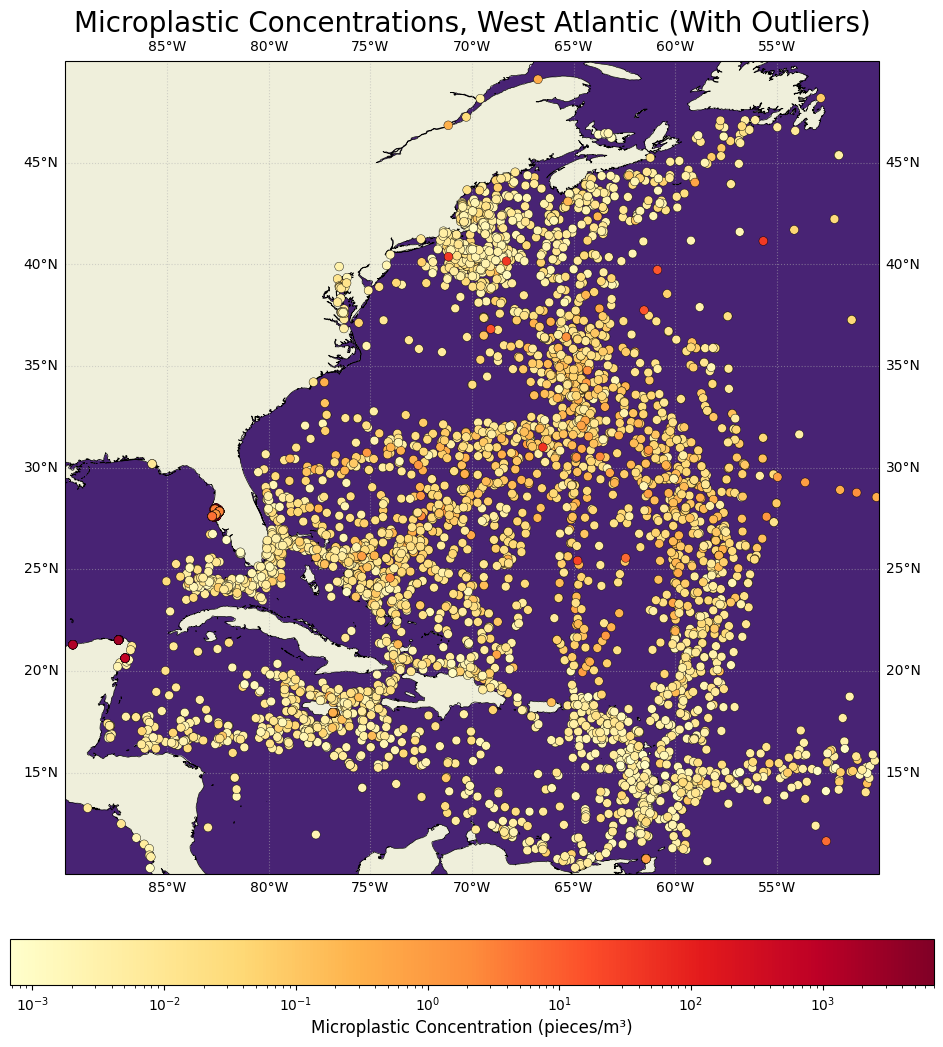

In [6]:
## Creating an initial map of the West Atlantic

## Setting up variables/NaN filters
lon_filt=filtered_Neust['Longitude(degree)']
lat_filt=filtered_Neust['Latitude (degree)']
mp_measurement=filtered_Neust['Microplastics measurement']
masked_mp=np.ma.masked_where(np.isnan(mp_measurement),mp_measurement)

## There is a large range of values, so log was applied to make data points distinguishable, help from Stack Overflow
from matplotlib.colors import LogNorm
norm = LogNorm(vmin=mp_measurement.min(), vmax=mp_measurement.max())

## Map building
fig=plt.figure(figsize=(12,12))
ax=plt.axes(projection=ccrs.PlateCarree())
gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle=':',alpha=0.5, zorder=0)
ax.coastlines(resolution='10m', linewidth=0.5, color='0', zorder=1)
## zorder used to place elements in background that were previously covering datapoints

pcm = ax.scatter( lon_filt,lat_filt, transform=ccrs.PlateCarree(),
    c=mp_measurement, cmap='YlOrRd', s=40, norm = norm,
    edgecolor='k', linewidth=0.3, zorder=2
)

## Adjusting map appearance
cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', fraction=0.05,pad=0.07)
cbar.set_label('Microplastic Concentration (pieces/m³)', fontsize=12)
ax.add_feature(cfeature.OCEAN, facecolor='#482374', zorder=0)
ax.add_feature(cfeature.LAND, facecolor='#EFEFDB', zorder=0)
plt.title('Microplastic Concentrations, West Atlantic (With Outliers)',fontsize=20)
ax.set_extent([-90,-50, 10,50], crs=ccrs.PlateCarree())

In [7]:
# @title
# fig=plt.figure(figsize=(12,12))
# ax=plt.axes(projection=ccrs.Robinson())
# gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle=':',alpha=0.5, zorder=0)
# ax.coastlines(resolution='10m', color='0.3', zorder=1)
# norm = LogNorm(vmin=mp_measurement.min(), vmax=mp_measurement.max())

# pcm = ax.scatter(
#     lon_filt,
#     lat_filt,
#     transform=ccrs.PlateCarree(),
#     c=mp_measurement,
#     cmap='plasma',
#     s=40,
#     norm = norm,
#     edgecolor='k',
#     linewidth=0.3,
#     zorder=2
# )

# cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', fraction=0.05,pad=0.07)
# cbar.set_label('Microplastic Concentration (pieces/m³)', fontsize=12)

# plt.title('Microplastic concentrations (pieces/m3), Florida',fontsize=20)

# ax.set_extent([-85,-80, 25,30], crs=ccrs.PlateCarree())

4391

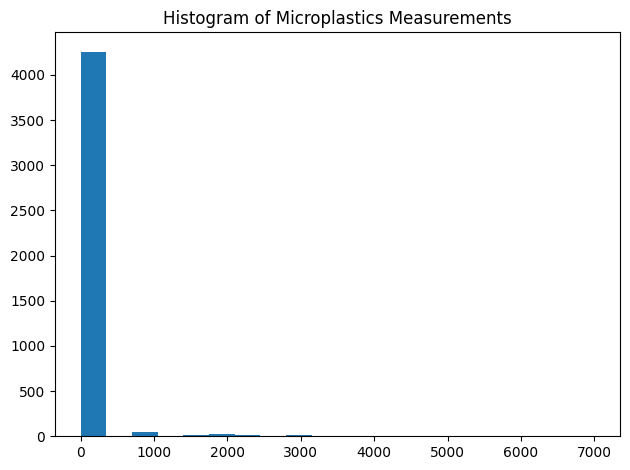

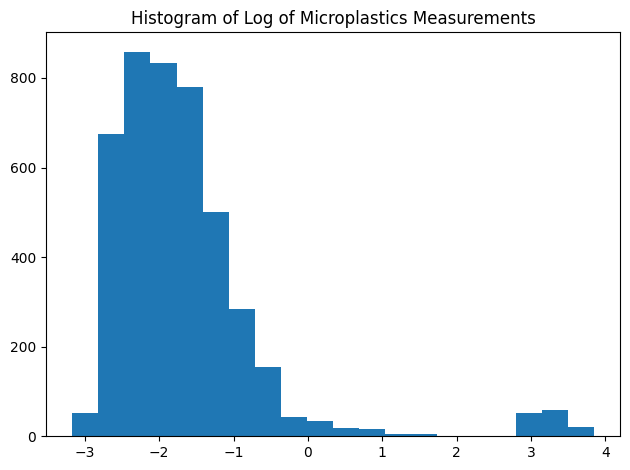

4150


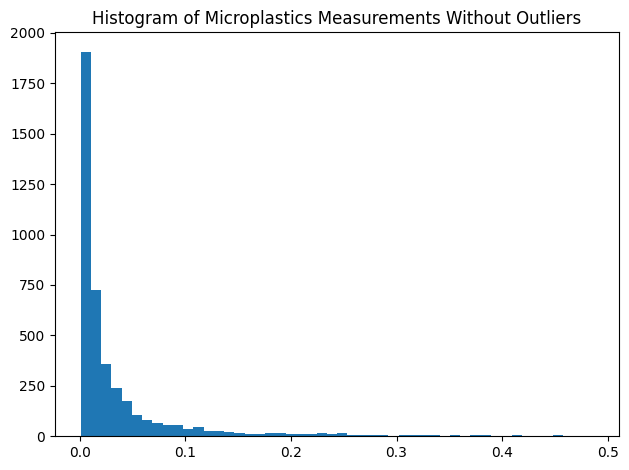

In [8]:
#Create histograms of measurements

#Setup
lat_min = 10
lat_max = 50
lon_min = -90
lon_max = -50
filtered_Neust = dat_Neust[dat_Neust['Unit'] == 'pieces/m3']
filtered_Neust = filtered_Neust[filtered_Neust['Microplastics measurement'] > 0]
hist_dat = filtered_Neust.loc[(filtered_Neust['Longitude(degree)']>lon_min) & (filtered_Neust['Longitude(degree)']<lon_max) & (filtered_Neust['Latitude (degree)']>lat_min) & (filtered_Neust['Latitude (degree)']<lat_max),'Microplastics measurement']
display(len(hist_dat))
log_hist_dat = np.log10(hist_dat)

#Base Hist
plt.hist(hist_dat, bins = 20)
plt.title("Histogram of Microplastics Measurements")
plt.tight_layout()
plt.show()

#Base log Hist
plt.hist(log_hist_dat, bins = 20)
plt.title("Histogram of Log of Microplastics Measurements")
plt.tight_layout()
plt.show()

#Base filtered Hist
filt_hist_dat = hist_dat.loc[hist_dat<.5]
print(len(filt_hist_dat))
plt.hist(filt_hist_dat, bins = 50)
plt.title("Histogram of Microplastics Measurements Without Outliers")
plt.tight_layout()
plt.show()

4150


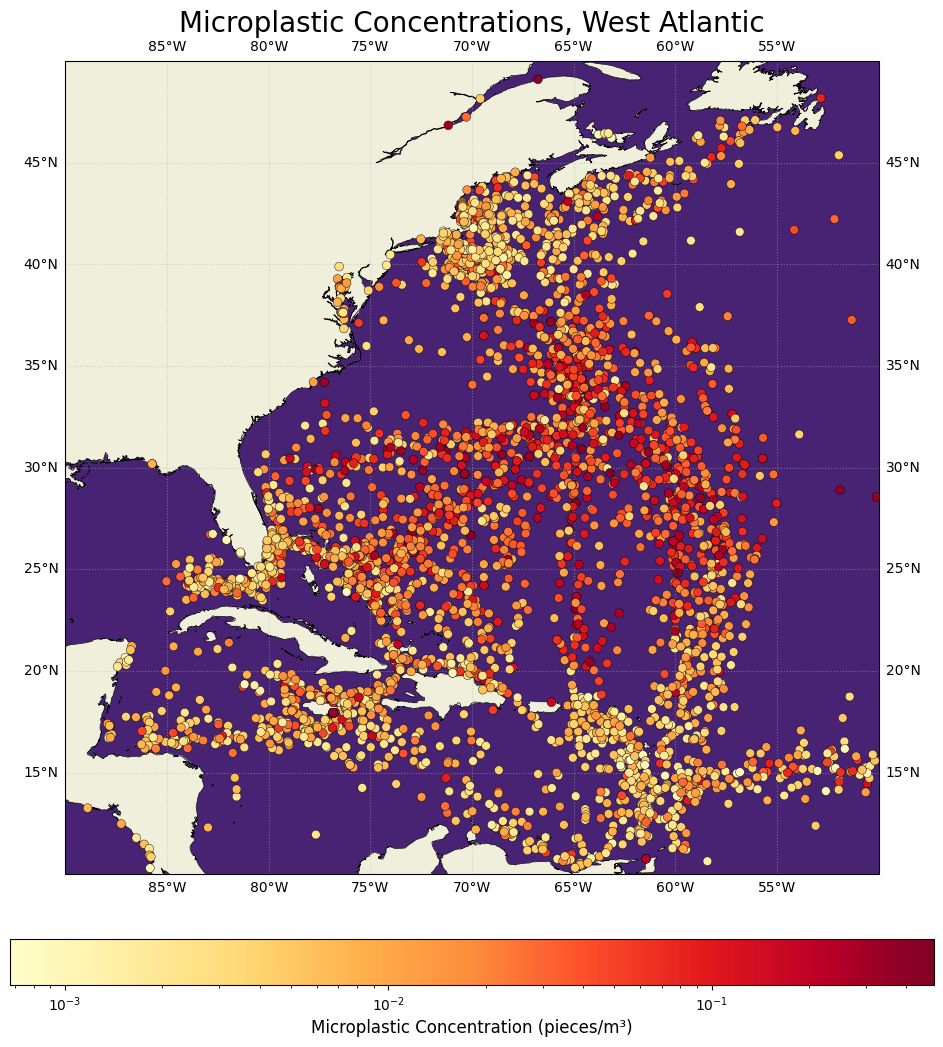

In [9]:
## Making a new map with no outliers for a clearer picture

##Creating a new dataset that will be neuston net, pieces/m3, and no outliers (concentration less than 0.5)
nooutliers_data = dat_Neust[dat_Neust['Unit'] == 'pieces/m3']
nooutliers_data = nooutliers_data[nooutliers_data['Microplastics measurement'] > 0]
nooutliers_data = nooutliers_data[nooutliers_data['Microplastics measurement'] < 0.5]
print(len(nooutliers_data))


## Creating plotting variables
lon_filt=nooutliers_data['Longitude(degree)']
lat_filt=nooutliers_data['Latitude (degree)']
nooutliers_mp_measurement=nooutliers_data['Microplastics measurement']

## Adjusting to a log scale for clearer data
norm = LogNorm(vmin=nooutliers_mp_measurement.min(), vmax=nooutliers_mp_measurement.max())

## Map building
fig=plt.figure(figsize=(12,12))
ax=plt.axes(projection=ccrs.PlateCarree())
gl=ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle=':',alpha=0.5, zorder=0)
ax.coastlines(resolution='10m', linewidth=0.5, color='0', zorder=1)

pcm = ax.scatter(lon_filt, lat_filt, transform=ccrs.PlateCarree(),
    c=nooutliers_mp_measurement, cmap='YlOrRd', s=40, norm = norm,
    edgecolor='k', linewidth=0.3, zorder=2
)

## Adjusting map appearance
ax.add_feature(cfeature.OCEAN, facecolor='#482374', zorder=0)
ax.add_feature(cfeature.LAND, facecolor='#EFEFDB', zorder=0)
cbar = plt.colorbar(pcm, ax=ax, orientation='horizontal', fraction=0.05,pad=0.07)
cbar.set_label('Microplastic Concentration (pieces/m³)', fontsize=12)
plt.title('Microplastic Concentrations, West Atlantic',fontsize=20)
ax.set_extent([-90,-50, 10,50], crs=ccrs.PlateCarree())

In [10]:
## Unfiltered stats
print('Data with outliers:')
print('range:', hist_dat.min(), 'to', hist_dat.max())
print('mean:', hist_dat.mean())
print('stdev:', hist_dat.std())
print()
## No outlier stats
print('Data without outliers:')
print('range:', nooutliers_data['Microplastics measurement'].min(), 'to', nooutliers_data['Microplastics measurement'].max())
print('mean:', nooutliers_data['Microplastics measurement'].mean())
print('stdev:', nooutliers_data['Microplastics measurement'].std())

Data with outliers:
range: 0.000676 to 7000.0
mean: 59.379549774083344
stdev: 401.7279366406164

Data without outliers:
range: 0.000676 to 0.48668
mean: 0.03536473542168675
stdev: 0.06342716453905498


/tmp/ipython-input-2043496299.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  nooutliers_data['Date'] = pd.to_datetime(nooutliers_data['Date (MM-DD-YYYY)'], errors='coerce')


Region with most history: (np.float64(41.0), np.float64(-71.0)) with 20 unique years of data.


/tmp/ipython-input-2043496299.py:29: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_mean_loc = loc_data.set_index('Date')['Microplastics measurement'].resample('Y').mean()


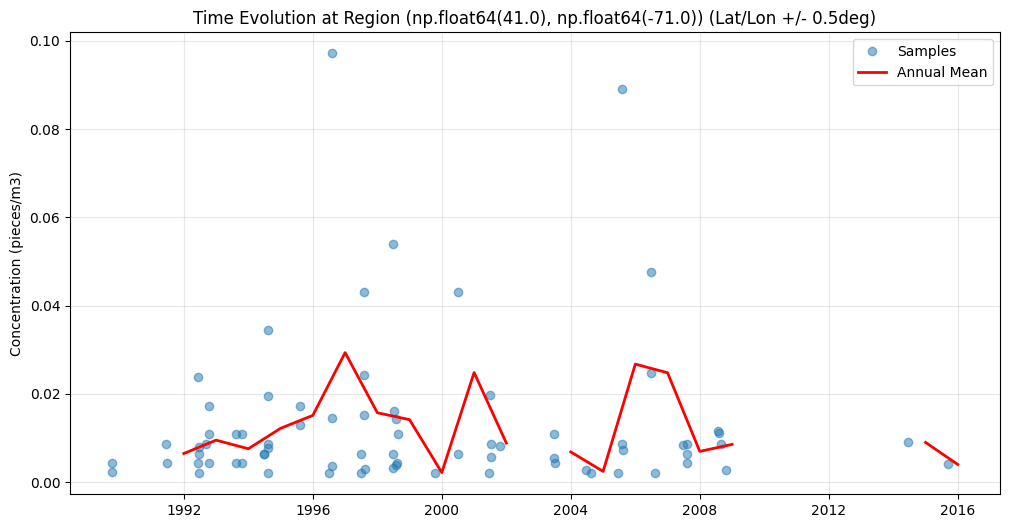

In [11]:
# GOAL 1: Evolution in time of the location with most historic data

nooutliers_data['Date'] = pd.to_datetime(nooutliers_data['Date (MM-DD-YYYY)'], errors='coerce')
nooutliers_data['Year'] = nooutliers_data['Date'].dt.year

#round lat/lon places (distance to consider ~111km) to group nearby stations > suggestion by Google to do a more thorugh and complete check
nooutliers_data['Lat_bin'] = nooutliers_data['Latitude (degree)'].round(0)
nooutliers_data['Lon_bin'] = nooutliers_data['Longitude(degree)'].round(0)

#Count unique years to find site with more samples
loc_counts = nooutliers_data.groupby(['Lat_bin', 'Lon_bin'])['Year'].nunique().sort_values(ascending=False)
best_loc = loc_counts.index[0]

print(f"Region with most history: {best_loc} with {loc_counts.iloc[0]} unique years of data.")

#Extract data for this specific region
loc_data = nooutliers_data[
    (nooutliers_data['Lat_bin'] == best_loc[0]) &
    (nooutliers_data['Lon_bin'] == best_loc[1])
].sort_values('Date')



plt.figure(figsize=(12, 6))
plt.plot(loc_data['Date'], loc_data['Microplastics measurement'], 'o', alpha=0.5, label='Samples')


#Calculate and plot annual mean for this location
annual_mean_loc = loc_data.set_index('Date')['Microplastics measurement'].resample('Y').mean()
plt.plot(annual_mean_loc.index, annual_mean_loc, 'r-', linewidth=2, label='Annual Mean')

plt.title(f'Time Evolution at Region {best_loc} (Lat/Lon +/- 0.5deg)')
plt.ylabel('Concentration (pieces/m3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

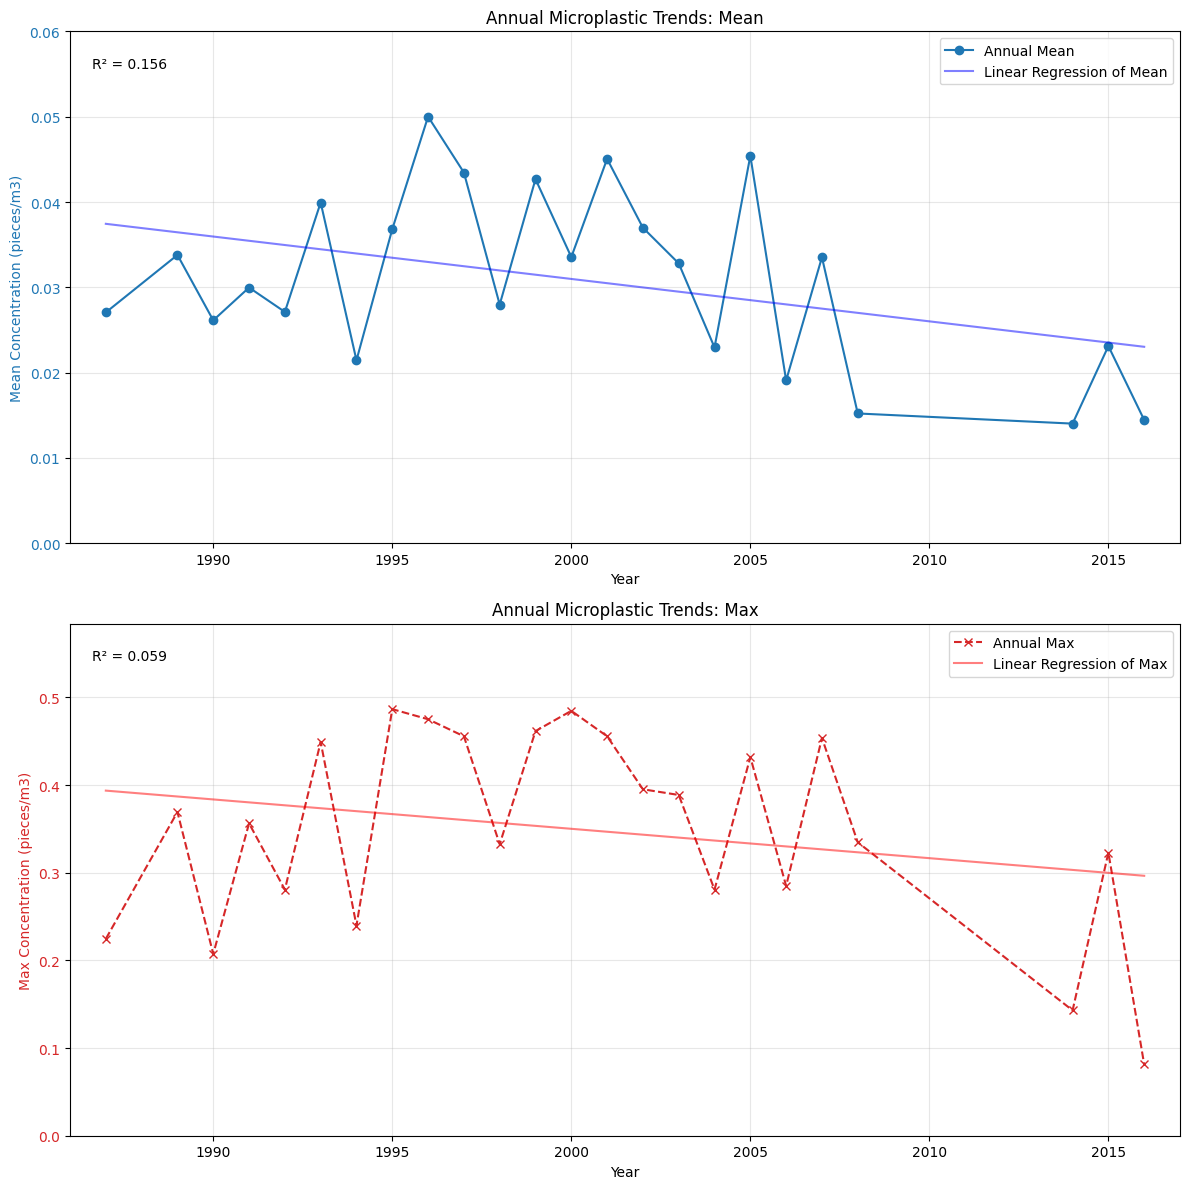

Year with highest average concentration: 1996 (Mean: 0.0500)
Linear Regression of Max R²: 0.05881661130441115
Linear Regression of Mean R²: 0.15578243454909077
Linear Regression of Max Slope: -0.0033507228709159084
Linear Regression of Mean Slope: -0.0004970881440394151


In [12]:
# GOAL 2: High concentration moments > is there a year with an 'unnormal' behaviour?

#statistics by year
yearly_stats = nooutliers_data.groupby('Year')['Microplastics measurement'].agg(['mean', 'max', 'count'])
#print(yearly_stats["count"])
#display(yearly_stats)
yearly_stats = yearly_stats.loc[yearly_stats["count"]>=30,:]
#display(yearly_stats)

#mean and max
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Concentration (pieces/m3)', color=color)
ax1.plot(yearly_stats.index, yearly_stats['mean'], color=color, marker='o', label='Annual Mean')
ax1.tick_params(axis='y', labelcolor=color)


#ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_xlabel('Year')
ax2.set_ylabel('Max Concentration (pieces/m3)', color=color)
ax2.plot(yearly_stats.index, yearly_stats['max'], color=color, linestyle='--', marker='x', label='Annual Max')
ax2.tick_params(axis='y', labelcolor=color)

ax1.set_ylim(0,np.max(yearly_stats['mean'])*1.2)
ax2.set_ylim(0,np.max(yearly_stats['max'])*1.2)
ax1.set_xlim(np.min(yearly_stats.index)-1,np.max(yearly_stats.index)+1)
ax2.set_xlim(np.min(yearly_stats.index)-1,np.max(yearly_stats.index)+1)


m1, b1, r1, _, _ = linregress(yearly_stats.index, yearly_stats['mean'])
m2, b2, r2, _, _ = linregress(yearly_stats.index, yearly_stats['max'])

ax1.plot(yearly_stats.index, m1*yearly_stats.index + b1, color="blue", label="Linear Regression of Mean", alpha = .5)
ax2.plot(yearly_stats.index, m2*yearly_stats.index + b2, color="red", label="Linear Regression of Max", alpha = .5)

ax1.text(0.02, 0.95, f"R² = {r1**2:.3f}", transform=ax1.transAxes, va='top')
ax2.text(0.02, 0.95, f"R² = {r2**2:.3f}", transform=ax2.transAxes, va='top')

ax1.set_title('Annual Microplastic Trends: Mean')
ax2.set_title('Annual Microplastic Trends: Max')
ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

#Identify peak
peak_year = yearly_stats['mean'].idxmax()
print(f"Year with highest average concentration: {peak_year} (Mean: {yearly_stats.loc[peak_year, 'mean']:.4f})")
print(f"Linear Regression of Max R²: {r2**2}")
print(f"Linear Regression of Mean R²: {r1**2}")
print(f"Linear Regression of Max Slope: {m2}")
print(f"Linear Regression of Mean Slope: {m1}")




In [13]:
!pip install parcels
import parcels

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.2/160.2 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.8/98.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 7.1 MB/s eta 0:00:00
  Created wheel for cgen: filename=cgen-2025.1-py3-none-any.whl size=19882 sha256=3c333a155f97ca1d58b290aef8a852e387c2cd6147d6488e1d28f495c867c2fe
  Stored in directory: /root/.cache/pip/wheels

In [14]:
!pip install copernicusmarine
import copernicusmarine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.7/207.7 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.3.1
    Uninstalling click-8.3.1:
      Successfully uninstalled click-8.3.1


In [15]:
#Read in ocean surface current data from Copernicus Marine

#lon = [-90,-50]
#lat = [10,50]
atlantic_ocean_2016=copernicusmarine.open_dataset(
  dataset_id="cmems_mod_glo_phy_my_0.083deg_P1D-m",
  variables=["uo", "vo", "zos"], ## What are these variables?
  minimum_longitude=-100,
  maximum_longitude=-40,
  minimum_latitude=0,
  maximum_latitude=60,
  start_datetime="2016-01-01T23:00:00",
  end_datetime="2017-01-01T23:00:00",
  minimum_depth=0.49402499198913574, ## the CMDS has weird conventions about the surface depth
  maximum_depth=0.49402499198913574,
)


INFO - 2025-12-05T03:54:21Z - Selected dataset version: "202311"
INFO:copernicusmarine:Selected dataset version: "202311"
INFO - 2025-12-05T03:54:22Z - Selected dataset part: "default"
INFO:copernicusmarine:Selected dataset part: "default"
INFO - 2025-12-05T03:54:22Z - Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register
INFO:copernicusmarine:Downloading Copernicus Marine data requires a Copernicus Marine username and password, sign up for free at: https://data.marine.copernicus.eu/register


Copernicus Marine username: jfrank
Copernicus Marine password: ··········


In [17]:
#Slice data to get only what we need for simulation

#display(nooutliers_data.loc[nooutliers_data["Year"]==2016,:])
atlantic_ocean_2016=atlantic_ocean_2016.sel(longitude=slice(-90,-50),
                                      latitude=slice(10,50),
                                       depth=0.49402499198913574)

dat2016 = nooutliers_data.loc[nooutliers_data["Year"]==2016,:]
lats = dat2016["Latitude (degree)"]
lons = dat2016["Longitude(degree)"]

In [ ]:
#Set up fieldset and particles for our simulation
fieldset = parcels.FieldSet.from_xarray_dataset(atlantic_ocean_2016,{'U':'uo','V':'vo'},{'lat':'latitude','lon':'longitude','time':'time'})
lat,lon=np.meshgrid(fieldset.U.grid.lon,fieldset.U.grid.lon)
n = len(lons)
pset = parcels.ParticleSet(
    fieldset=fieldset,
    pclass=parcels.JITParticle,
    lat=lats,
    lon=lons,
    depth=np.ones(n)*0.49402499198913574,
    time=fieldset.U.grid.time[-1] ##THIS NEEDS TO BE CHANGED WHEN GOING FORWARD/BACKWARD
)
#display(fieldset)


In [ ]:
#Important setting for our simulation
def CheckOutOfBounds(particle, fieldset, time):
    if particle.state == StatusCode.ErrorOutOfBounds:
        particle.delete()
import os
os.environ["CC"] = "gcc"

In [ ]:
#This cell runs the simulation, and can take a long time.
#DO NOT RUN UNLESS YOU WANT ANOTHER SIMULATION

outfile_name="../content/drive/Shareddrives/ENSC36100_Project/output/simdatX"#Change this to change simulation output
output = pset.ParticleFile(name=outfile_name, outputdt=timedelta(hours=3)) # saving the trajectories every 3 hours
output.metadata["date_created"] = datetime.now().isoformat()
print("0")
pset.execute(parcels.AdvectionRK4+pset.Kernel(CheckOutOfBounds),
             dt=-timedelta(hours=1), # Update the particle paths every 1 hour
             runtime=timedelta(days=60),
             output_file=output)
print("1")

0
INFO: Output files are stored in ../content/drive/Shareddrives/ENSC36100_Project/output/simdat5.zarr.


INFO:parcels.tools.loggers:Output files are stored in ../content/drive/Shareddrives/ENSC36100_Project/output/simdat5.zarr.





  0%|          | 0/5184000.0 [00:00<?, ?it/s]


  0%|          | 3600.0/5184000.0 [00:00<14:29, 5960.09it/s]


  0%|          | 14400.0/5184000.0 [00:01<07:17, 11814.46it/s]


  0%|          | 25200.0/5184000.0 [00:02<06:35, 13048.37it/s]


  1%|          | 36000.0/5184000.0 [00:02<06:06, 14057.18it/s]


  1%|          | 46800.0/5184000.0 [00:03<05:55, 14457.78it/s]


  1%|          | 57600.0/5184000.0 [00:04<05:38, 15150.87it/s]


  1%|▏         | 68400.0/5184000.0 [00:04<05:31, 15443.18it/s]


  2%|▏         | 79200.0/5184000.0 [00:05<05:45, 14766.03it/s]


  2%|▏         | 90000.0/5184000.0 [00:06<05:33, 15274.68it/s]


  2%|▏         | 100800.0/5184000.0 [00:06<05:28, 15455.74it/s]


  2%|▏         | 111600.0/5184000.0 [00:07<05:32, 15257.87it/s]


  2%|▏         | 122400.0/5184000.0 [00:08<05:27, 15434.11it/s]


  3%|▎         | 133200.0/5184000.0 [00:09<05:33, 15134.32it/s]


  3%|▎         | 144000.0/5184000.0 [00:10<06:27, 13020.82it/s]


  3%|▎         | 154800.0/5184000.0 

In [18]:
#Open first simulaton
atlantic_run = xr.open_zarr("../content/drive/Shareddrives/ENSC36100_Project/output/simdat4.zarr")
atlantic_ocean_2016=atlantic_ocean_2016.assign(magnitude=np.hypot((atlantic_ocean_2016["uo"]),(atlantic_ocean_2016["vo"])),
                                    direction=np.arctan2(atlantic_ocean_2016["vo"],atlantic_ocean_2016["uo"]))
plotting_lons=atlantic_ocean_2016['longitude'].values
plotting_lats=atlantic_ocean_2016['latitude'].values
current_velocities=atlantic_ocean_2016['magnitude'].isel(time=0).values

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:1677: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ((5, 2)).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = super().scatter(*args, **kwargs)


Text(0.5, 1.0, 'MP samples after 180 days')

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:483: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:483: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:509: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:509: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:483: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().

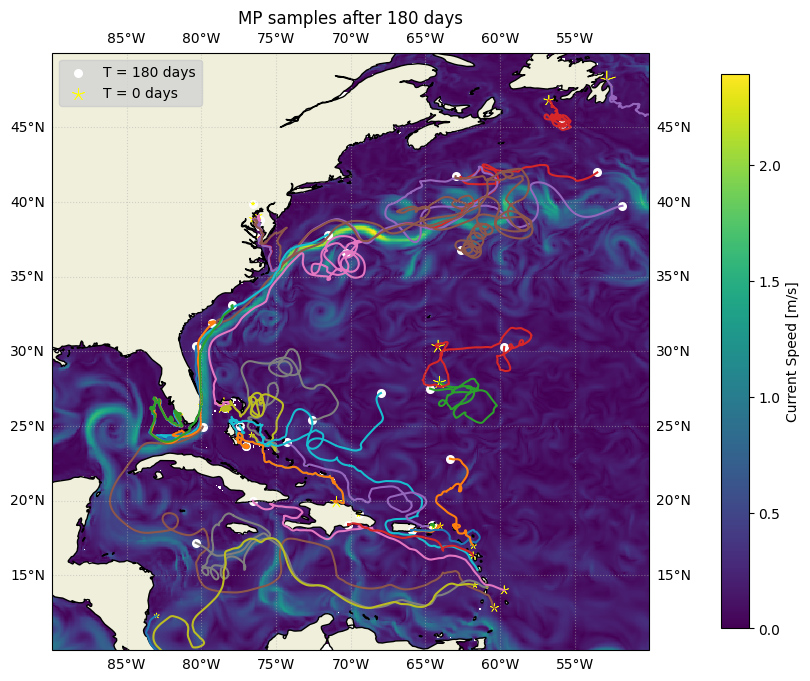

In [22]:
#Plot simulation
fig = plt.figure(figsize=(8, 8),layout='constrained')
ax2 = fig.add_subplot(
    projection=ccrs.PlateCarree(),
)

#Coastlines
ax2.coastlines()

#Current magnitudes
mesh=ax2.pcolormesh(
   plotting_lons,plotting_lats,current_velocities
)

#Land
ax2.add_feature(cartopy.feature.LAND, zorder=1)
c=fig.colorbar(mesh,ax=ax2,location='right', shrink = .7)
c.set_label('Current Speed [m/s]')

#Plotting paths and endpoints
ax2.plot(atlantic_run['lon'].T,atlantic_run['lat'].T)
#ax2.scatter(atlantic_run['lon'].values[:,0],atlantic_run['lat'].values[:,0],c='yellow',s=50, label = "T = 0 days")#dat2016['Microplastics measurement']*100)
ax2.scatter(atlantic_run['lon'].values[:,-1],atlantic_run['lat'].values[:,-1],c='white',s=30, label = "T = 180 days")#dat2016['Microplastics measurement']*100)
ax2.scatter(lons,lats,c='yellow',marker=(5,2),s=dat2016['Microplastics measurement']*2000, label = "T = 0 days",edgecolor="black",linewidth=.5)

#Set up final plot details
extent=[-90,-50,10,50]
leg = ax2.legend()
leg.get_frame().set_facecolor('lightgrey')
ax2.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle=':',alpha=0.5, zorder=0)
ax2.set_extent(extent,crs=ccrs.PlateCarree())
ax2.set_title('MP samples after 180 days')

In [23]:
#Open second simulaton
atlantic_run2 = xr.open_zarr("../content/drive/Shareddrives/ENSC36100_Project/output/simdat5.zarr")
atlantic_ocean_2016_2=atlantic_ocean_2016.assign(magnitude=np.hypot((atlantic_ocean_2016["uo"]),(atlantic_ocean_2016["vo"])),
                                    direction=np.arctan2(atlantic_ocean_2016["vo"],atlantic_ocean_2016["uo"]))
plotting_lons=atlantic_ocean_2016_2['longitude'].values
plotting_lats=atlantic_ocean_2016_2['latitude'].values
current_velocities=atlantic_ocean_2016_2['magnitude'].isel(time=0).values

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:1677: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ((5, 2)).  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  result = super().scatter(*args, **kwargs)


Text(0.5, 1.0, 'MP samples going back 60 days')

/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:483: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:483: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().get_tightbbox(renderer, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:509: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:509: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().draw(renderer=renderer, **kwargs)
/usr/local/lib/python3.12/dist-packages/cartopy/mpl/geoaxes.py:483: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  return super().

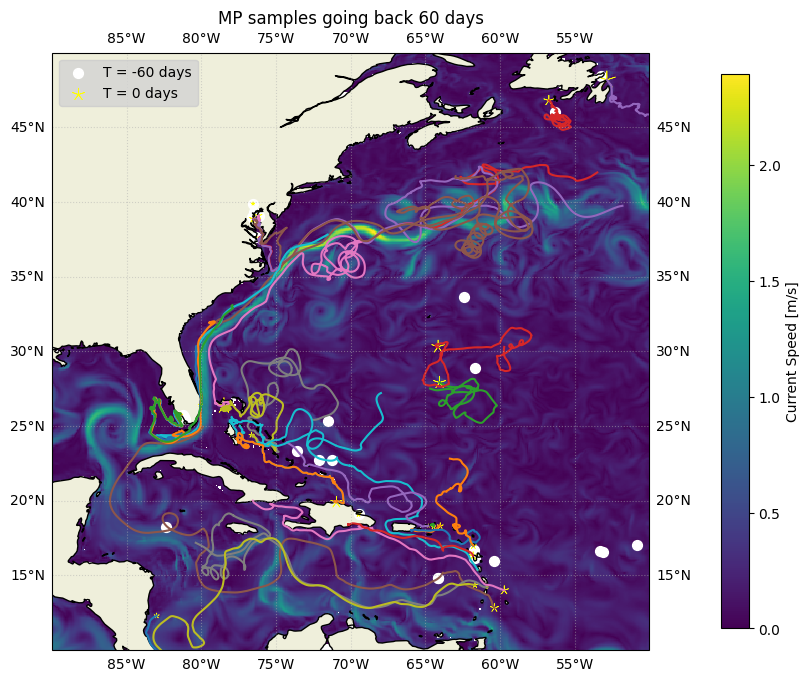

In [25]:
#Plot simulation
fig = plt.figure(figsize=(8, 8),layout='constrained')
ax2 = fig.add_subplot(
    projection=ccrs.PlateCarree(),
)

#Coastlines
ax2.coastlines()

#Current magnitudes
mesh=ax2.pcolormesh(
   plotting_lons,plotting_lats,current_velocities
)

#Land
ax2.add_feature(cartopy.feature.LAND, zorder=1)
c=fig.colorbar(mesh,ax=ax2,location='right', shrink = .7)
c.set_label('Current Speed [m/s]')

#Plotting paths and endpoints
ax2.plot(atlantic_run['lon'].T,atlantic_run['lat'].T)
#ax2.scatter(atlantic_run['lon'].values[:,0],atlantic_run['lat'].values[:,0],c='yellow',s=50, label="T = 0 days")#dat2016['Microplastics measurement']*100)
ax2.scatter(atlantic_run2['lon'].values[:,-1],atlantic_run2['lat'].values[:,-1],c='white',s=50, label="T = -60 days")#dat2016['Microplastics measurement']*100)
ax2.scatter(lons,lats,c='yellow',marker=(5,2),s=dat2016['Microplastics measurement']*2000, label = "T = 0 days",edgecolor="black",linewidth=.5)

#Final plot details
leg = ax2.legend()
leg.get_frame().set_facecolor('lightgrey')
extent=[-90,-50,10,50]
ax2.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linestyle=':',alpha=0.5, zorder=0)
ax2.set_extent(extent,crs=ccrs.PlateCarree())
ax2.set_title('MP samples going back 60 days')